In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris_raw = load_iris()

In [3]:
iris = pd.DataFrame(data=np.c_[iris_raw['data'], iris_raw['target']], columns=iris_raw['feature_names'] + ['target'])

1. Displaying data (at least first rows)

In [4]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


2. Display number of rows and columns

In [5]:
# simplest is probably by using shape - returns tuple (rows, cols)
iris.shape

(150, 5)

3. Describe columns

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


4. Group by

In [7]:
# Display top 5 most common petal lengths
petal_len_group = iris.groupby(by="petal length (cm)")
sizes = petal_len_group.size()
sizes = sizes.sort_values(ascending=False)
sizes.head()

petal length (cm)
1.5    13
1.4    13
4.5     8
5.1     8
1.6     7
dtype: int64

5. Head - now I realised that it's what I did in pt 1

6. `dropna` drops, but if I want to check if there are missing values, I'd like to use `isna()`

In [8]:
isna_table = iris.isna()

7. sort values ascending by 2nd column

In [9]:
iris.sort_values(by=iris.columns[1], ascending=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1.0
62,6.0,2.2,4.0,1.0,1.0
119,6.0,2.2,5.0,1.5,2.0
68,6.2,2.2,4.5,1.5,1.0
41,4.5,2.3,1.3,0.3,0.0
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,0.0
14,5.8,4.0,1.2,0.2,0.0
32,5.2,4.1,1.5,0.1,0.0
33,5.5,4.2,1.4,0.2,0.0


8. min and max petal length + index

In [10]:
col_name = 'petal length (cm)'

min_idx = iris[[col_name]].idxmin()[col_name]
min_val = iris.loc[min_idx][col_name]

max_idx = iris[[col_name]].idxmax()[col_name]
max_val = iris.loc[max_idx][col_name]

print(f'Min: {min_val} at {min_idx}, max: {max_val} at {max_idx}')

Min: 1.0 at 22, max: 6.9 at 118


9. std

In [11]:
iris.describe().loc['std']

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
Name: std, dtype: float64

10. sepal lengths longer than average

In [12]:
sepal_mean = iris['sepal length (cm)'].mean()
print(sepal_mean)
longer_than_avg = iris.loc[iris['sepal length (cm)'] > sepal_mean]
longer_than_avg

5.843333333333335


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
54,6.5,2.8,4.6,1.5,1.0
56,6.3,3.3,4.7,1.6,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


11. histograms

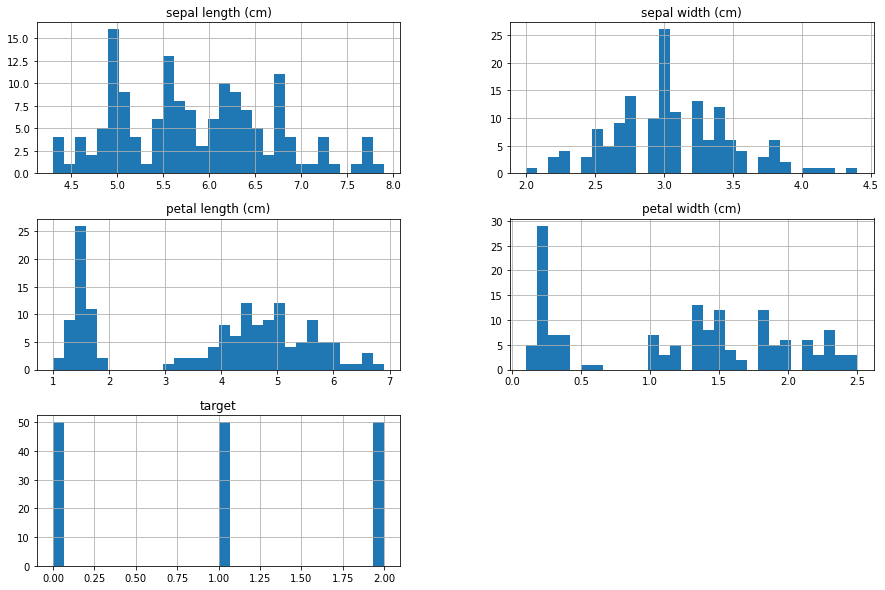

In [16]:
iris.hist(bins=30, figsize=(15, 10))
plt.show()